In [26]:
!pip install opencv-python

In [28]:
%%cmd
where python

Microsoft Windows [Version 10.0.19045.2251]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\suena\PycharmProjects\UCSDBootCamp\capstone\Survey>where python
C:\Users\suena\anaconda3\python.exe
C:\Users\suena\AppData\Local\Microsoft\WindowsApps\python.exe

(base) C:\Users\suena\PycharmProjects\UCSDBootCamp\capstone\Survey>

In [29]:
%%cmd
pip install face_recognition

Microsoft Windows [Version 10.0.19045.2251]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\suena\PycharmProjects\UCSDBootCamp\capstone\Survey>pip install face_recognition


  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [7 lines of output]
  running bdist_wheel
  running build
  running build_py
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib


  Running setup.py clean for dlib
Failed to build dlib


  Running setup.py install for dlib: started
  Running setup.py install for dlib: finished with status 'error'


  error: subprocess-exited-with-error
  
  Running setup.py install for dlib did not run successfully.
  exit code: 1
  
  [9 lines of output]
  running install
  C:\Users\suena\anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: legacy-install-failure

Encountered error while trying to install package.

dlib

note: This is an issue with the package mentioned above, not pip.
hint: See above for output from the failure.



(base) C:\Users\suena\PycharmProjects\UCSDBootCamp\capstone\Survey>

In [30]:
%%cmd
pip install cmake

Microsoft Windows [Version 10.0.19045.2251]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\suena\PycharmProjects\UCSDBootCamp\capstone\Survey>pip install cmake


     --------------------------------------- 32.6/32.6 MB 13.1 MB/s eta 0:00:00



(base) C:\Users\suena\PycharmProjects\UCSDBootCamp\capstone\Survey>

In [31]:
!pip install dlib

  Using cached dlib-19.24.0.tar.gz (3.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dlib: filename=dlib-19.24.0-cp38-cp38-win_amd64.whl size=3053962 sha256=0632311e328a7f05fe56d83835f6f2568d2dec6e6b7eddf7bd54706df1fb8781
  Stored in directory: c:\users\suena\appdata\local\pip\cache\wheels\4c\d8\2d\a83b10e7bf10cd7d8bef36bf4dcd15b0c9ebf98f990bc984dd
Successfully built dlib


In [32]:
!pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)


In [1]:
import os
import cv2
import dlib
import numpy as np
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, Flatten, Layer, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [2]:
import face_recognition
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Using VGG16 model

In [3]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [261]:
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
IMAGE_SIZE = (150,150,3)
vgg_model = VGG16(include_top=False, input_shape=IMAGE_SIZE, weights='imagenet')
# Do not train existing weights
vgg_model.trainable = False
vgg_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [6]:
# add custom layers
x = Flatten()(vgg_model.output)
d = Dense(4096, activation='sigmoid')(x)
embedding = Model(inputs=vgg_model.input, outputs=d)
embedding.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

# Using Xception

In [98]:
from keras.applications.xception import Xception

In [99]:
xcep_model = Xception(weights='imagenet', input_shape=(150,150,3), include_top=False)
xcep_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_6[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 18, 18, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 18, 18, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_3 (Conv2D)              (None, 9, 9, 728)    186368      ['add_1[0][0]']                  
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 9, 9, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 9, 9, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 9, 9, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 9, 9, 728)   0           ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 9, 9, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 9, 9, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 9, 9, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 9, 9, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (Add)                   (None, 9, 9, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_9[0][0]']                  
                                                                                                  
 block13_sepconv1_act (Activati  (None, 9, 9, 728)   0           ['add_10[0][0]']                 
 on)      

In [100]:
xcep_model.trainable = False

In [101]:
# Create a new model on top -- using GlobalAveragePooling2D
inputs = keras.Input(shape=(150,150,3))
x = xcep_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
d = Dense(1024, activation='sigmoid')(x)
embedding = Model(inputs=inputs, outputs=d)
embedding.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 1024)              2098176   
                                                                 
Total params: 22,959,656
Trainable params: 2,098,176
Non-trainable params: 20,861,480
_________________________________________________________________


In [102]:
# Create a new model on top -- using Flatten
inputs = keras.Input(shape=(150,150,3))
x = xcep_model(inputs, training=False)
f = Flatten()(x)
d = Dense(4096, activation='sigmoid')(f)
embedding = Model(inputs=inputs, outputs=d)
embedding.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 4096)              209719296 
                                                                 
Total params: 230,580,776
Trainable params: 209,719,296
Non-trainable params: 20,861,480
_________________________________________________________________


# Using ResNet50

In [89]:
from keras.applications.resnet import ResNet50

In [90]:
model = ResNet50()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [91]:
res_model = ResNet50(include_top=False, input_shape=(150,150,3))
res_model.trainable = False
res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 38, 38, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 38, 38, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 19, 19, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 19, 19, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_2_bn[0][0]']      
 n)       

 conv5_block2_1_conv (Conv2D)   (None, 5, 5, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 5, 5, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 5, 5, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 5, 5, 512)    2359808     ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_blo

In [188]:
# add custom layers
c = Conv2D(256,(4,4), activation='relu')(res_model.output)
x = Flatten()(c)
d = Dense(4096, activation='sigmoid')(x)
embedding = Model(inputs=res_model.input, outputs=d)
embedding.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [92]:
# add custom layers - w/o Conv2D
x = Flatten()(res_model.output)
d = Dense(4096, activation='sigmoid')(x)
embedding = Model(inputs=res_model.input, outputs=d)
embedding.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

 conv2_block3_2_conv (Conv2D)   (None, 38, 38, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 38, 38, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 19, 19, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 19, 19, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_2_bn[0][0]']      
 n)       

 conv5_block2_1_conv (Conv2D)   (None, 5, 5, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 5, 5, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 5, 5, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 5, 5, 512)    2359808     ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_blo

In [7]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [8]:
model = InceptionResNetV2(include_top=False, input_shape=(105,105,3))
model.summary()

219055592/219055592 [==============================] - 8s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 52, 52, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 52, 52, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
             

 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 10, 10, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 10, 10, 64)  192         ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 10, 10, 96)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activatio

 conv2d_22 (Conv2D)             (None, 10, 10, 48)   13824       ['activation_21[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 10, 10, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 10, 10, 48)  144         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 10, 10, 32)   0           ['batch_normalization_19[0][0]'] 
                                                                                                  
 activatio

                                                                                                  
 activation_29 (Activation)     (None, 10, 10, 64)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 10, 10, 128)  0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
                                                                  'activation_29[0][0]']          
                                                                                                  
 block35_3_conv (Conv2D)        (None, 10, 10, 320)  41280       ['block35_3_mixed[0][0]']        
                                                                                                  
 block35_3 (Lambda)             (None, 10, 10, 320)  0           ['block35_2_ac[0][0]',           
          

                                                                                                  
 activation_37 (Activation)     (None, 10, 10, 32)   0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 activation_40 (Activation)     (None, 10, 10, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 10, 10, 32)   10240       ['block35_4_ac[0][0]']           
                                                                                                  
 conv2d_38 (Conv2D)             (None, 10, 10, 32)   9216        ['activation_37[0][0]']          
                                                                                                  
 conv2d_41 (Conv2D)             (None, 10, 10, 64)   27648       ['activation_40[0][0]']          
          

 block35_6_conv (Conv2D)        (None, 10, 10, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 10, 10, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 10, 10, 320)  0           ['block35_6[0][0]']              
                                                                                                  
 conv2d_51 (Conv2D)             (None, 10, 10, 32)   10240       ['block35_6_ac[0][0]']           
                                                                                                  
 batch_normalization_51 (BatchN  (None, 10, 10, 32)  96          ['conv2d_51[0][0]']              
 ormalizat

 conv2d_56 (Conv2D)             (None, 10, 10, 32)   9216        ['activation_55[0][0]']          
                                                                                                  
 conv2d_59 (Conv2D)             (None, 10, 10, 64)   27648       ['activation_58[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 10, 10, 32)  96          ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_56 (BatchN  (None, 10, 10, 32)  96          ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 conv2d_69 (Conv2D)             (None, 10, 10, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_69 (BatchN  (None, 10, 10, 32)  96          ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_69 (Activation)     (None, 10, 10, 32)   0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_67 (Conv2D)             (None, 10, 10, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 conv2d_70 (Conv2D)             (None, 10, 10, 48)   13824       ['activation_69[0][0]']          
          

 mixed_6a (Concatenate)         (None, 4, 4, 1088)   0           ['activation_72[0][0]',          
                                                                  'activation_75[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_77 (Conv2D)             (None, 4, 4, 128)    139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_77 (BatchN  (None, 4, 4, 128)   384         ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_77 (Activation)     (None, 4, 4, 128)    0           ['batch_normalization_77[0][0]'] 
          

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 4, 4, 128)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 conv2d_86 (Conv2D)             (None, 4, 4, 160)    143360      ['activation_85[0][0]']          
                                                                                                  
 batch_normalization_86 (BatchN  (None, 4, 4, 160)   480         ['conv2d_86[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_86 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_86[0][0]'] 
          

 ormalization)                                                                                    
                                                                                                  
 activation_94 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_94[0][0]'] 
                                                                                                  
 conv2d_92 (Conv2D)             (None, 4, 4, 192)    208896      ['block17_4_ac[0][0]']           
                                                                                                  
 conv2d_95 (Conv2D)             (None, 4, 4, 192)    215040      ['activation_94[0][0]']          
                                                                                                  
 batch_normalization_92 (BatchN  (None, 4, 4, 192)   576         ['conv2d_92[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 batch_normalization_100 (Batch  (None, 4, 4, 192)   576         ['conv2d_100[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_103 (Batch  (None, 4, 4, 192)   576         ['conv2d_103[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_100 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_100[0][0]']
                                                                                                  
 activation_103 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_103[0][0]']
          

 activation_108 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_108[0][0]']
                                                                                                  
 activation_111 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_111[0][0]']
                                                                                                  
 block17_9_mixed (Concatenate)  (None, 4, 4, 384)    0           ['activation_108[0][0]',         
                                                                  'activation_111[0][0]']         
                                                                                                  
 block17_9_conv (Conv2D)        (None, 4, 4, 1088)   418880      ['block17_9_mixed[0][0]']        
                                                                                                  
 block17_9 (Lambda)             (None, 4, 4, 1088)   0           ['block17_8_ac[0][0]',           
          

 block17_11_conv (Conv2D)       (None, 4, 4, 1088)   418880      ['block17_11_mixed[0][0]']       
                                                                                                  
 block17_11 (Lambda)            (None, 4, 4, 1088)   0           ['block17_10_ac[0][0]',          
                                                                  'block17_11_conv[0][0]']        
                                                                                                  
 block17_11_ac (Activation)     (None, 4, 4, 1088)   0           ['block17_11[0][0]']             
                                                                                                  
 conv2d_121 (Conv2D)            (None, 4, 4, 128)    139264      ['block17_11_ac[0][0]']          
                                                                                                  
 batch_normalization_121 (Batch  (None, 4, 4, 128)   384         ['conv2d_121[0][0]']             
 Normaliza

 conv2d_129 (Conv2D)            (None, 4, 4, 128)    139264      ['block17_13_ac[0][0]']          
                                                                                                  
 batch_normalization_129 (Batch  (None, 4, 4, 128)   384         ['conv2d_129[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_129 (Activation)    (None, 4, 4, 128)    0           ['batch_normalization_129[0][0]']
                                                                                                  
 conv2d_130 (Conv2D)            (None, 4, 4, 160)    143360      ['activation_129[0][0]']         
                                                                                                  
 batch_normalization_130 (Batch  (None, 4, 4, 160)   480         ['conv2d_130[0][0]']             
 Normaliza

 conv2d_138 (Conv2D)            (None, 4, 4, 160)    143360      ['activation_137[0][0]']         
                                                                                                  
 batch_normalization_138 (Batch  (None, 4, 4, 160)   480         ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 4, 4, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_136 (Conv2D)            (None, 4, 4, 192)    208896      ['block17_15_ac[0][0]']          
                                                                                                  
 conv2d_139 (Conv2D)            (None, 4, 4, 192)    215040      ['activation_138[0][0]']         
          

 conv2d_144 (Conv2D)            (None, 4, 4, 192)    208896      ['block17_17_ac[0][0]']          
                                                                                                  
 conv2d_147 (Conv2D)            (None, 4, 4, 192)    215040      ['activation_146[0][0]']         
                                                                                                  
 batch_normalization_144 (Batch  (None, 4, 4, 192)   576         ['conv2d_144[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_147 (Batch  (None, 4, 4, 192)   576         ['conv2d_147[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_155 (Batch  (None, 4, 4, 192)   576         ['conv2d_155[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_152 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_152[0][0]']
                                                                                                  
 activation_155 (Activation)    (None, 4, 4, 192)    0           ['batch_normalization_155[0][0]']
                                                                                                  
 block17_20_mixed (Concatenate)  (None, 4, 4, 384)   0           ['activation_152[0][0]',         
                                                                  'activation_155[0][0]']         
                                                                                                  
 block17_2

 Normalization)                                                                                   
                                                                                                  
 activation_165 (Activation)    (None, 1, 1, 224)    0           ['batch_normalization_165[0][0]']
                                                                                                  
 conv2d_163 (Conv2D)            (None, 1, 1, 192)    399360      ['mixed_7a[0][0]']               
                                                                                                  
 conv2d_166 (Conv2D)            (None, 1, 1, 256)    172032      ['activation_165[0][0]']         
                                                                                                  
 batch_normalization_163 (Batch  (None, 1, 1, 192)   576         ['conv2d_163[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_171 (Batch  (None, 1, 1, 192)   576         ['conv2d_171[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_174 (Batch  (None, 1, 1, 256)   768         ['conv2d_174[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_171 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_171[0][0]']
                                                                                                  
 activation_174 (Activation)    (None, 1, 1, 256)    0           ['batch_normalization_174[0][0]']
          

 activation_179 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 activation_182 (Activation)    (None, 1, 1, 256)    0           ['batch_normalization_182[0][0]']
                                                                                                  
 block8_5_mixed (Concatenate)   (None, 1, 1, 448)    0           ['activation_179[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 block8_5_conv (Conv2D)         (None, 1, 1, 2080)   933920      ['block8_5_mixed[0][0]']         
                                                                                                  
 block8_5 (Lambda)              (None, 1, 1, 2080)   0           ['block8_4_ac[0][0]',            
          

 block8_7_conv (Conv2D)         (None, 1, 1, 2080)   933920      ['block8_7_mixed[0][0]']         
                                                                                                  
 block8_7 (Lambda)              (None, 1, 1, 2080)   0           ['block8_6_ac[0][0]',            
                                                                  'block8_7_conv[0][0]']          
                                                                                                  
 block8_7_ac (Activation)       (None, 1, 1, 2080)   0           ['block8_7[0][0]']               
                                                                                                  
 conv2d_192 (Conv2D)            (None, 1, 1, 192)    399360      ['block8_7_ac[0][0]']            
                                                                                                  
 batch_normalization_192 (Batch  (None, 1, 1, 192)   576         ['conv2d_192[0][0]']             
 Normaliza

 conv2d_200 (Conv2D)            (None, 1, 1, 192)    399360      ['block8_9_ac[0][0]']            
                                                                                                  
 batch_normalization_200 (Batch  (None, 1, 1, 192)   576         ['conv2d_200[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_200 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_200[0][0]']
                                                                                                  
 conv2d_201 (Conv2D)            (None, 1, 1, 224)    129024      ['activation_200[0][0]']         
                                                                                                  
 batch_normalization_201 (Batch  (None, 1, 1, 224)   672         ['conv2d_201[0][0]']             
 Normaliza

# EffieicntNetV2S

In [93]:
from keras.applications.efficientnet_v2 import EfficientNetV2S

In [94]:
eff_model = EfficientNetV2S()
eff_model.trainable = False
eff_model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 384, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 384, 384, 3)  0           ['input_4[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 192, 192, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

 block2c_expand_activation (Act  (None, 96, 96, 192)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 96, 96, 48)   9216        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 96, 96, 48)  192         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_drop (Dropout)         (None, 96, 96, 48)   0           ['block2c_project_bn[0][0]']     
          

                                                                  'block3b_add[0][0]']            
                                                                                                  
 block3d_expand_conv (Conv2D)   (None, 48, 48, 256)  147456      ['block3c_add[0][0]']            
                                                                                                  
 block3d_expand_bn (BatchNormal  (None, 48, 48, 256)  1024       ['block3d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3d_expand_activation (Act  (None, 48, 48, 256)  0          ['block3d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3d_p

                                                                                                  
 block4b_project_conv (Conv2D)  (None, 24, 24, 128)  65536       ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 24, 24, 128)  512        ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (Dropout)         (None, 24, 24, 128)  0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 24, 24, 128)  0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
          

                                                                                                  
 block4d_drop (Dropout)         (None, 24, 24, 128)  0           ['block4d_project_bn[0][0]']     
                                                                                                  
 block4d_add (Add)              (None, 24, 24, 128)  0           ['block4d_drop[0][0]',           
                                                                  'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 24, 24, 512)  65536       ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 24, 24, 512)  2048       ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block5a_expand_conv (Conv2D)   (None, 24, 24, 768)  98304       ['block4f_add[0][0]']            
                                                                                                  
 block5a_expand_bn (BatchNormal  (None, 24, 24, 768)  3072       ['block5a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5a_expand_activation (Act  (None, 24, 24, 768)  0          ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv2 (DepthwiseConv  (None, 24, 24, 768)  6912       ['block5a_expand_activation[0][0]
 2D)      

 2D)                                                             ']                               
                                                                                                  
 block5c_bn (BatchNormalization  (None, 24, 24, 960)  3840       ['block5c_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5c_activation (Activation  (None, 24, 24, 960)  0          ['block5c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 960)         0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5e_activation (Activation  (None, 24, 24, 960)  0          ['block5e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 960)         0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5e_se_reshape[0][0]']     
                                                                                                  
 block5e_s

                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5g_se_reshape[0][0]']     
                                                                                                  
 block5g_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, 24, 24, 960)  0           ['block5g_activation[0][0]',     
                                                                  'block5g_se_expand[0][0]']      
                                                                                                  
 block5g_p

 block5i_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5i_se_reduce[0][0]']      
                                                                                                  
 block5i_se_excite (Multiply)   (None, 24, 24, 960)  0           ['block5i_activation[0][0]',     
                                                                  'block5i_se_expand[0][0]']      
                                                                                                  
 block5i_project_conv (Conv2D)  (None, 24, 24, 160)  153600      ['block5i_se_excite[0][0]']      
                                                                                                  
 block5i_project_bn (BatchNorma  (None, 24, 24, 160)  640        ['block5i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5i_d

                                                                                                  
 block6b_drop (Dropout)         (None, 12, 12, 256)  0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 12, 12, 256)  0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 12, 12, 1536  393216      ['block6b_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 12, 12, 1536  6144       ['block6c_expand_conv[0][0]']    
 ization) 

 block6d_add (Add)              (None, 12, 12, 256)  0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block6e_expand_conv (Conv2D)   (None, 12, 12, 1536  393216      ['block6d_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6e_expand_bn (BatchNormal  (None, 12, 12, 1536  6144       ['block6e_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6e_expand_activation (Act  (None, 12, 12, 1536  0          ['block6e_expand_bn[0][0]']      
 ivation) 

 block6g_expand_conv (Conv2D)   (None, 12, 12, 1536  393216      ['block6f_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6g_expand_bn (BatchNormal  (None, 12, 12, 1536  6144       ['block6g_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6g_expand_activation (Act  (None, 12, 12, 1536  0          ['block6g_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6g_dwconv2 (DepthwiseConv  (None, 12, 12, 1536  13824      ['block6g_expand_activation[0][0]
 2D)      

 block6i_expand_bn (BatchNormal  (None, 12, 12, 1536  6144       ['block6i_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6i_expand_activation (Act  (None, 12, 12, 1536  0          ['block6i_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6i_dwconv2 (DepthwiseConv  (None, 12, 12, 1536  13824      ['block6i_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6i_bn (BatchNormalization  (None, 12, 12, 1536  6144       ['block6i_dwconv2[0][0]']        
 )        

 block6k_expand_activation (Act  (None, 12, 12, 1536  0          ['block6k_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6k_dwconv2 (DepthwiseConv  (None, 12, 12, 1536  13824      ['block6k_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6k_bn (BatchNormalization  (None, 12, 12, 1536  6144       ['block6k_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6k_activation (Activation  (None, 12, 12, 1536  0          ['block6k_bn[0][0]']             
 )        

 block6m_dwconv2 (DepthwiseConv  (None, 12, 12, 1536  13824      ['block6m_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6m_bn (BatchNormalization  (None, 12, 12, 1536  6144       ['block6m_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6m_activation (Activation  (None, 12, 12, 1536  0          ['block6m_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6m_se_squeeze (GlobalAver  (None, 1536)        0           ['block6m_activation[0][0]']     
 agePoolin

 block6o_bn (BatchNormalization  (None, 12, 12, 1536  6144       ['block6o_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6o_activation (Activation  (None, 12, 12, 1536  0          ['block6o_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6o_se_squeeze (GlobalAver  (None, 1536)        0           ['block6o_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6o_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6o_se_squeeze[0][0]']     
          

In [95]:
eff_model = EfficientNetV2S(include_top=False, input_shape=(105,105,3))
eff_model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 105, 105, 3)  0           ['input_5[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 53, 53, 24)   648         ['rescaling_1[0][0]']            
                                                                                                  
 stem_bn (BatchNormalization)   (None, 53, 53, 24)   96          ['stem_conv[0][0]'

                                                                                                  
 block2c_project_bn (BatchNorma  (None, 27, 27, 48)  192         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_drop (Dropout)         (None, 27, 27, 48)   0           ['block2c_project_bn[0][0]']     
                                                                                                  
 block2c_add (Add)              (None, 27, 27, 48)   0           ['block2c_drop[0][0]',           
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block2d_expand_conv (Conv2D)   (None, 27, 27, 192)  82944       ['block2c_add[0][0]']            
          

 ization)                                                                                         
                                                                                                  
 block3d_expand_activation (Act  (None, 14, 14, 256)  0          ['block3d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3d_project_conv (Conv2D)  (None, 14, 14, 64)   16384       ['block3d_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3d_project_bn (BatchNorma  (None, 14, 14, 64)  256         ['block3d_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block4b_drop (Dropout)         (None, 7, 7, 128)    0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 7, 7, 128)    0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_expand_conv (Conv2D)   (None, 7, 7, 512)    65536       ['block4b_add[0][0]']            
                                                                                                  
 block4c_expand_bn (BatchNormal  (None, 7, 7, 512)   2048        ['block4c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 7, 7, 512)    65536       ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 7, 7, 512)   2048        ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4e_expand_activation (Act  (None, 7, 7, 512)   0           ['block4e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4e_dwconv2 (DepthwiseConv  (None, 7, 7, 512)   4608        ['block4e_expand_activation[0][0]
 2D)      

                                                                                                  
 block5a_expand_activation (Act  (None, 7, 7, 768)   0           ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv2 (DepthwiseConv  (None, 7, 7, 768)   6912        ['block5a_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, 7, 7, 768)   3072        ['block5a_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5a_a

 block5c_activation (Activation  (None, 7, 7, 960)   0           ['block5c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 960)         0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5c_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5c_se_reshape[0][0]']     
                                                                                                  
 block5c_s

                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5e_se_reshape[0][0]']     
                                                                                                  
 block5e_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5e_se_reduce[0][0]']      
                                                                                                  
 block5e_se_excite (Multiply)   (None, 7, 7, 960)    0           ['block5e_activation[0][0]',     
                                                                  'block5e_se_expand[0][0]']      
                                                                                                  
 block5e_p

 block5g_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, 7, 7, 960)    0           ['block5g_activation[0][0]',     
                                                                  'block5g_se_expand[0][0]']      
                                                                                                  
 block5g_project_conv (Conv2D)  (None, 7, 7, 160)    153600      ['block5g_se_excite[0][0]']      
                                                                                                  
 block5g_project_bn (BatchNorma  (None, 7, 7, 160)   640         ['block5g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5g_d

 block5i_project_conv (Conv2D)  (None, 7, 7, 160)    153600      ['block5i_se_excite[0][0]']      
                                                                                                  
 block5i_project_bn (BatchNorma  (None, 7, 7, 160)   640         ['block5i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5i_drop (Dropout)         (None, 7, 7, 160)    0           ['block5i_project_bn[0][0]']     
                                                                                                  
 block5i_add (Add)              (None, 7, 7, 160)    0           ['block5i_drop[0][0]',           
                                                                  'block5h_add[0][0]']            
                                                                                                  
 block6a_e

 block6c_expand_conv (Conv2D)   (None, 4, 4, 1536)   393216      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 4, 4, 1536)  6144        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 4, 4, 1536)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_dwconv2 (DepthwiseConv  (None, 4, 4, 1536)  13824       ['block6c_expand_activation[0][0]
 2D)                                                             ']                               
          

 block6e_expand_activation (Act  (None, 4, 4, 1536)  0           ['block6e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6e_dwconv2 (DepthwiseConv  (None, 4, 4, 1536)  13824       ['block6e_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6e_bn (BatchNormalization  (None, 4, 4, 1536)  6144        ['block6e_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6e_activation (Activation  (None, 4, 4, 1536)  0           ['block6e_bn[0][0]']             
 )        

                                                                                                  
 block6g_bn (BatchNormalization  (None, 4, 4, 1536)  6144        ['block6g_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6g_activation (Activation  (None, 4, 4, 1536)  0           ['block6g_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6g_se_squeeze (GlobalAver  (None, 1536)        0           ['block6g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6g_s

 )                                                                                                
                                                                                                  
 block6i_se_squeeze (GlobalAver  (None, 1536)        0           ['block6i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6i_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6i_se_squeeze[0][0]']     
                                                                                                  
 block6i_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6i_se_reshape[0][0]']     
                                                                                                  
 block6i_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6i_se_reduce[0][0]']      
          

 block6k_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6k_se_squeeze[0][0]']     
                                                                                                  
 block6k_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6k_se_reshape[0][0]']     
                                                                                                  
 block6k_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6k_se_reduce[0][0]']      
                                                                                                  
 block6k_se_excite (Multiply)   (None, 4, 4, 1536)   0           ['block6k_activation[0][0]',     
                                                                  'block6k_se_expand[0][0]']      
                                                                                                  
 block6k_project_conv (Conv2D)  (None, 4, 4, 256)    393216      ['block6k_se_excite[0][0]']      
          

                                                                                                  
 block6m_se_excite (Multiply)   (None, 4, 4, 1536)   0           ['block6m_activation[0][0]',     
                                                                  'block6m_se_expand[0][0]']      
                                                                                                  
 block6m_project_conv (Conv2D)  (None, 4, 4, 256)    393216      ['block6m_se_excite[0][0]']      
                                                                                                  
 block6m_project_bn (BatchNorma  (None, 4, 4, 256)   1024        ['block6m_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6m_drop (Dropout)         (None, 4, 4, 256)    0           ['block6m_project_bn[0][0]']     
          

                                                                                                  
 block6o_project_bn (BatchNorma  (None, 4, 4, 256)   1024        ['block6o_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6o_drop (Dropout)         (None, 4, 4, 256)    0           ['block6o_project_bn[0][0]']     
                                                                                                  
 block6o_add (Add)              (None, 4, 4, 256)    0           ['block6o_drop[0][0]',           
                                                                  'block6n_add[0][0]']            
                                                                                                  
 top_conv (Conv2D)              (None, 4, 4, 1280)   327680      ['block6o_add[0][0]']            
          

## Capture faces from video

In [ ]:
# work on later

# Siamese Network

In [7]:
positive_path = os.path.join('data/train','positive')
negative_path = os.path.join('data/train','negative')
anchor_path = os.path.join('data/train','anchor')

In [8]:
# shuffle=False to load the files in order
anchor = tf.data.Dataset.list_files(anchor_path+'\*.jpg', shuffle=False).take(375)
positive = tf.data.Dataset.list_files(positive_path+'\*.jpg', shuffle=False).take(375)
negative = tf.data.Dataset.list_files(negative_path+'\*.jpg').take(375)

In [9]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [10]:
samples = data.as_numpy_iterator()

In [11]:
example = samples.next()
example # --> creating dataset (filename, filename, label)

(b'data\\train\\anchor\\combined_02_1.jpg_0.jpg',
 b'data\\train\\positive\\combined_02_1.jpg_1.jpg',
 1.0)

In [12]:
def preprocess(file_path):
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)
    # Preprocessing steps - resizing the image to be 105x105
    img = tf.image.resize(img, (150,150))
    # Scale image to be between 0 and 1
    img = img / 255.0
    
    # Return iimage
    return img

In [13]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [14]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024) 

In [15]:
# Training partition
train_data = data.take(round(len(data)*.8))
train_data = train_data.batch(20) 
train_data = train_data.prefetch(10) 

In [16]:
# Testing partition
test_data = data.skip(round(len(data)*.8))
test_data = test_data.take(round(len(data)*.2))
test_data = test_data.batch(20)
test_data = test_data.prefetch(10)

In [17]:
# Build Distance Layer
# Create Siamese L1 distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
    
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [18]:
# Make Siamese model
def make_siamese_model():
        
    # anchor impage input in the network
    input_image = Input(name='input_img', shape=(150,150,3))
    
    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(150,150,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [19]:
siamese_model = make_siamese_model()
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_1 (Functional)           (None, 4096)         48273216    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [20]:
# Loss & optimizer
binary_cross_loss = tf.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.Adam(1e-4) 

In [21]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [22]:
# Build train step function & train loop
## function
@tf.function ## compiling what is happening in the def below
def train_step(batch):
    
    # Record all of our operations
    with tf.GradientTape() as tape: ##  record operations for automatic differentiation - get gradient
        
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

In [23]:
## train loop
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
    
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [24]:
# Train model
EPOCHS = 20

In [25]:
train(train_data, EPOCHS)


 Epoch 1/20
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
30/30 [==============================] - 52s 2s/step

 Epoch 2/20
30/30 [==============================] - 47s 2s/step

 Epoch 3/20
30/30 [==============================] - 46s 2s/step

 Epoch 4/20
30/30 [==============================] - 46s 2s/step

 Epoch 5/20
30/30 [==============================] - 46s 2s/step

 Epoch 6/20
30/30 [==============================] - 46s 2s/step

 Epoch 7/20
30/30 [==============================] - 46s 2s/step

 Epoch 8/20
30/30 [==============================] - 46s 2s/step

 Epoch 9/20
30/30 [==============================] - 46s 2s/step

 Epoch 10/20
30/30 [==============================] - 46s 2s/step

 Epoch 11/20
30/30 [==============================] - 46s 2s/step

 Epoch 12/20
30/30 [==============================] - 46s 2s/step

 Epoch 13/20
30/30 [==============================

In [26]:
# Make predictions

# Import metric dalculations
from tensorflow.keras.metrics import Precision, Recall

In [48]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [49]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 5s 5s/step


array([[0.00582976],
       [0.98775   ],
       [0.00726569],
       [0.01915179],
       [0.00153214],
       [0.9977406 ],
       [0.994175  ],
       [0.9900817 ],
       [0.98303026],
       [0.00817698],
       [0.01389025],
       [0.9906125 ],
       [0.9945869 ],
       [0.01128577],
       [0.98556465],
       [0.00623535],
       [0.0224372 ],
       [0.00339233],
       [0.00233325],
       [0.00921858]], dtype=float32)

In [50]:
# Post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]

In [51]:
y_true

array([0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0.], dtype=float32)

In [52]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true,y_hat)

# Return recall result
m.result().numpy()

1.0

In [53]:
m = Precision()
m.update_state(y_true, y_hat)
m.result().numpy()

1.0

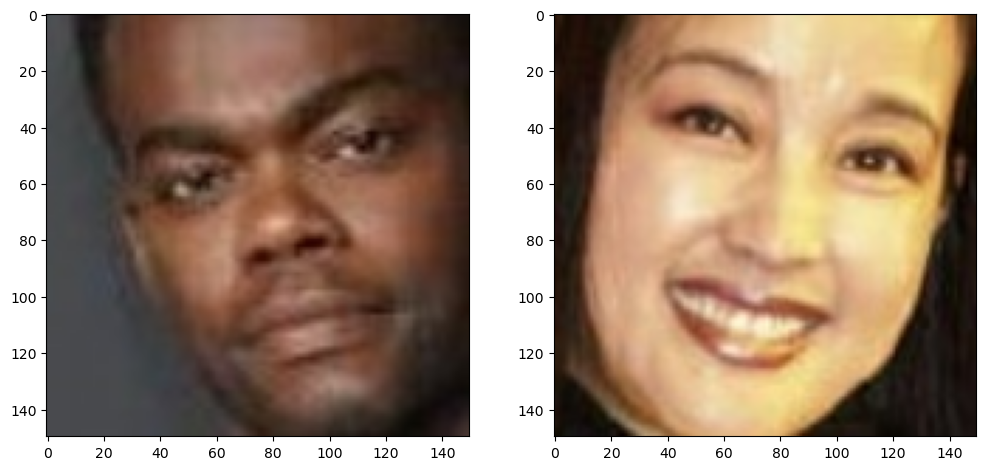

In [54]:
# visualize the results
# Set plot size
plt.figure(figsize=(12,6))

# Set first subplot
plt.subplot(1,2,1) ## 1 row, 2 columns, 1st image
plt.imshow(test_input[4])

# Set second subplot
plt.subplot(1,2,2) ## 1 row, 2 columns, 2nd image
plt.imshow(test_val[4])
plt.show()

In [55]:
# Save weights
siamese_model.save('siamesemodel_VGG16_2.h5')

In [57]:
# Reload model ('BinaryCrossentropy' may not need)
model = tf.keras.models.load_model('siamesemodel_VGG16_2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [58]:
# re** create validation pairs
positive_path = os.path.join('data/validation1','v')
negative_path = os.path.join('data/validation1','n')
anchor_p_path = os.path.join('data/validation1/a','pos')
anchor_n_path = os.path.join('data/validation1/a','neg')

# shuffle=False to load the files in order
anchorP = tf.data.Dataset.list_files(anchor_p_path+'\*.jpg', shuffle=False).take(23)
anchorN = tf.data.Dataset.list_files(anchor_n_path+'\*.jpg', shuffle=False).take(11)
positive = tf.data.Dataset.list_files(positive_path+'\*.jpg', shuffle=False).take(23)
negative = tf.data.Dataset.list_files(negative_path+'\*.jpg', shuffle=False).take(11)

positives = tf.data.Dataset.zip((anchorP, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchorP)))))
negatives = tf.data.Dataset.zip((anchorN, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchorN)))))
data = positives.concatenate(negatives)

In [59]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024) 

In [60]:
# validation
val_data = data.take(len(data))
val_data = val_data.batch(27)
val_data = val_data.prefetch(10)

In [83]:
# Get a batch of test data
val_input, val_val, y_true = val_data.as_numpy_iterator().next()

In [62]:
model.predict([val_input, val_val])

1/1 [==============================] - 5s 5s/step


array([[0.6099969 ],
       [0.89449966],
       [0.84342945],
       [0.9826916 ],
       [0.43395367],
       [0.78889036],
       [0.25727484],
       [0.5482177 ],
       [0.09788576],
       [0.04518413],
       [0.8583542 ],
       [0.20917201],
       [0.88788193],
       [0.881649  ],
       [0.86669916],
       [0.78652805],
       [0.8914674 ],
       [0.798883  ],
       [0.52335596],
       [0.37801194],
       [0.21590658],
       [0.8273944 ],
       [0.88783306],
       [0.9796227 ],
       [0.90263426],
       [0.97134537],
       [0.88966346]], dtype=float32)

In [84]:
# Make predictions
y_hat = siamese_model.predict([val_input, val_val])
y_hat

1/1 [==============================] - 6s 6s/step


array([[0.86669916],
       [0.6099969 ],
       [0.94292766],
       [0.21590658],
       [0.7390425 ],
       [0.88788193],
       [0.78889036],
       [0.25727484],
       [0.8273944 ],
       [0.5482177 ],
       [0.68749565],
       [0.9826916 ],
       [0.78652805],
       [0.798883  ],
       [0.8583542 ],
       [0.88783306],
       [0.52335596],
       [0.43395367],
       [0.20917201],
       [0.88966346],
       [0.54019976],
       [0.567178  ],
       [0.8914674 ],
       [0.97134537],
       [0.8944996 ],
       [0.09788576],
       [0.9796227 ]], dtype=float32)

In [85]:
# Post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1]

In [86]:
y_true

array([0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1.], dtype=float32)

In [87]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true,y_hat)

# Return recall result
m.result().numpy()

0.7368421

In [88]:
m = Precision()
m.update_state(y_true, y_hat)
m.result().numpy()

0.6363636

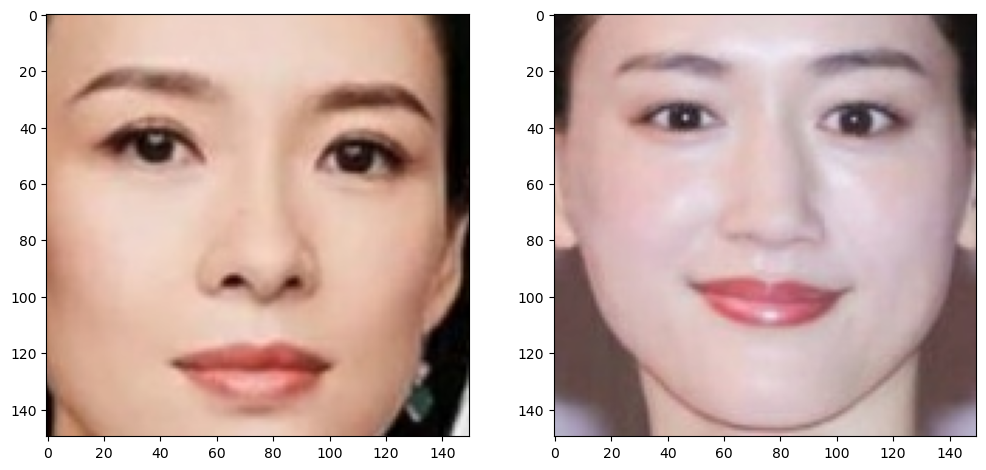

In [82]:
# visualize the results
# Set plot size
plt.figure(figsize=(12,6))

# Set first subplot
plt.subplot(1,2,1) ## 1 row, 2 columns, 1st image
plt.imshow(val_input[25])

# Set second subplot
plt.subplot(1,2,2) ## 1 row, 2 columns, 2nd image
plt.imshow(val_val[25])
plt.show()